In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from collections import Counter

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import nose
import scipy as sp
import keras
%matplotlib inline

C:\Users\lisam\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import tensorflow as tf

In [8]:
from ast import literal_eval

In [9]:
from preprocess import word_index

In [11]:
data = pd.read_csv("tok_sentence_baby_reviews.csv")

In [14]:
train, val, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [19]:
def text_to_num(traint):
    count_v = CountVectorizer()
    xt_count = count_v.fit_transform(traint)
    x_new_c = count_v.transform(textt)
    
    return xt_count, x_new_C

In [60]:
temp_y = pd.get_dummies(baby_reviews['polarity'], drop_first=True)
temp_x = baby_reviews['reviewText']

In [61]:
train = pd.read_csv('2nd_year_final/data/processed/tok_phase1_train80.csv')
val = pd.read_csv('2nd_year_final/data/processed/tok_phase1_validate10.csv')
test = pd.read_csv('2nd_year_final/data/processed/tok_phase1_test10.csv')

In [12]:
data.head()

,group_id,sentiment,uuid,sentence_tokens,sentence_wc,sentence_wc_std
0,1,neg,1114646400B000056OUGA3FFDK09UJS1TD,"['i', 'am', 'primarily', 'breastfeeding', 'but...",20,0.249451
1,1,neu,1114646400B000056OUGA3FFDK09UJS1TD,"['i', 'discovered', 'medela', 'microwave', 'st...",16,-0.118286
2,1,neu,1114646400B000056OUGA3FFDK09UJS1TD,"['i', 'feel', 'badly', 'for', 'the', 'waste', ...",16,-0.118286
3,1,pos,1114646400B000056OUGA3FFDK09UJS1TD,"['and', 'not', 'space', 'consuming', '.']",5,-1.129561
4,1,pos,1114646400B000056OUGA3FFDK09UJS1TD,"['plus', 'you', 'can', 'use', 'them', 'during'...",11,-0.577956


In [15]:
for frame in [train, val, test]:
    for col in ['sentence_tokens']:
        frame[col] = frame[col].map(literal_eval)

In [16]:
from scipy import sparse

def create_one_hot(labels, label_dict):
    """
    Args:
        labels:        array of labels, e.g. NumPy array or Pandas Series
        label_dict:    dict of label indices
    Return:
        one_hot_numpy: sparse CSR 2d array of one-hot vectors
    """
    one_hot_numpy = sparse.dok_matrix((len(labels), len(label_dict)), dtype=np.int8)
    for i, label in enumerate(labels):
        one_hot_numpy[i, label_dict[label]] = 1
    return sparse.csr_matrix(one_hot_numpy) 

def undo_one_hot(pred, label_list):
    """
    
    Args: 
        pred:       NumPy array of one-hot predicted classes
        label_list: a list of the label strings
    Return:
        label_pred: a list of predicted labels
    """
    label_pred = [label_list[np.argmax(row)] for row in pred]
    return label_pred
    # this could probably be done awesomely fast as NumPy vectorised but it works

In [17]:
def create_bow(docs, vocab_map):
    one_hot_numpy = sparse.dok_matrix((len(docs), len(vocab_map)), dtype=np.int8)
    for i, doc in enumerate(docs):
        for _j, token in enumerate(doc):
            if token in vocab_map:
                one_hot_numpy[i, vocab_map[token]] = 1
            
    return sparse.csr_matrix(one_hot_numpy) 

In [19]:
# label set
label_set = set(train['sentiment'].unique())

# label list and int map
label_list = sorted(label_set)
label_map = {word: index for index, word in enumerate(label_list)}

In [21]:
### Preprocessing 
# declare the padding and unknown symbols
pad_mask_int = 0
pad_mask_sym = '==pad_mask=='
unknown_int = 1
unknown_sym = '==unknown_sym=='

# vocabulary set
vocab_counter = Counter()
for doc in train['sentence_tokens']:
    vocab_counter.update(doc)    

min_times_word_used = 2 # if at least 2 then the model will be prepared for unknown words in test and validation sets
print(len(vocab_counter), "tokens before discarding those that appear less than {} times.".format(min_times_word_used))
for key in list(vocab_counter.keys()):
    if vocab_counter[key] < min_times_word_used: 
        vocab_counter.pop(key)
print(len(vocab_counter), "tokens after discarding those that appear less than {} times.".format(min_times_word_used))   
vocab_set = set(vocab_counter.keys())

# vocabulary list and int map
vocab_list = [pad_mask_sym, unknown_sym] + sorted(vocab_set)
vocab_map = {word: index for index, word in enumerate(vocab_list)}

7500 tokens before discarding those that appear less than 2 times.
4106 tokens after discarding those that appear less than 2 times.


In [23]:
train_sentence = create_bow(train['sentence_tokens'], vocab_map)

In [24]:
test_sentence = create_bow(test['sentence_tokens'], vocab_map)

In [25]:
y_train = create_one_hot(train['sentiment'], label_map)

In [30]:
x_train = train_sentence

In [28]:
y_val = create_one_hot(val['sentiment'], label_map)

In [27]:
x_val = create_bow(val['sentiment'], vocab_map) 

In [31]:
y_test = create_one_hot(test['sentiment'], label_map)
x_test = test_sentence

In [32]:
clf = LogisticRegression(random_state=0, solver='sag', multi_class='multinomial',  max_iter=200)

In [33]:
mm = np.array(y_train[:,0].todense()).ravel()

In [34]:
nn = np.array(y_val[:,0].todense()).ravel()

In [35]:
tt = np.array(y_test[:,0].todense()).ravel()

In [36]:
%%time
clf.fit(x_train, mm)

Wall time: 431 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
clf.predict(x_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [38]:
clf.predict_proba(x_train)

array([[0.55327784, 0.44672216],
       [0.52838502, 0.47161498],
       [0.510774  , 0.489226  ],
       ...,
       [0.47963745, 0.52036255],
       [0.67739846, 0.32260154],
       [0.69606868, 0.30393132]])

In [40]:
# lbfgs
lbfgs_train = clf.score(x_train, mm)
print("Training accuracy with LBFGS solver: %s" % lbfgs_train)

Training accuracy with LBFGS solver: 0.8888415672913118


In [41]:
# lbfgs
lbfgs_val = clf.score(x_val, nn)
print("Validation accuracy with LBFGS solver: %s" % lbfgs_val)

Validation accuracy with LBFGS solver: 0.7192590226764612


In [42]:
# newton-cg
ngc_train = clf.score(x_train, mm)
print("Training accuracy with Newton CG solver: %s" % ngc_train)

Training accuracy with Newton CG solver: 0.8888415672913118


In [43]:
# newton-cg
ncg_val = clf.score(x_val, nn)
print("Training accuracy with Newton CG solver: %s" % ncg_val)

Training accuracy with Newton CG solver: 0.7192590226764612


In [44]:
# sag
sag_train = clf.score(x_train, mm)
print("Training accuracy with SAG solver: %s" % sag_train)

Training accuracy with SAG solver: 0.8888415672913118


In [45]:
# sag
sag_val = clf.score(x_val, nn)
print("Training accuracy with SAG solver: %s" % sag_val)

Training accuracy with SAG solver: 0.7192590226764612


In [46]:
clf.fit(x_test, tt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
clf.predict(x_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [48]:
clf.predict_proba(x_test)

array([[0.39301926, 0.60698074],
       [0.78371874, 0.21628126],
       [0.65573386, 0.34426614],
       ...,
       [0.22148942, 0.77851058],
       [0.69521015, 0.30478985],
       [0.67430448, 0.32569552]])

In [49]:
# sag
sag_test = clf.score(x_test, tt)
print("Training accuracy with SAG solver: %s" % sag_test)

Training accuracy with SAG solver: 0.9300542957521558


In [33]:
import matplotlib.pyplot as plt

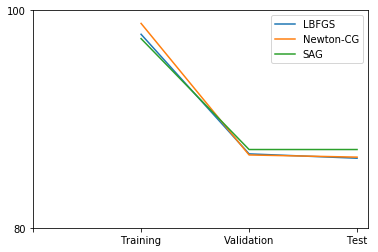

In [47]:
y = [1,2,3]
lbfgs = [97.8, 86.8, 86.4] 
newton = [98.8, 86.7,86.5] 
sag = [97.4, 87.2, 87.2] 

plt.plot(y, lbfgs)
plt.plot(y, newton)
plt.plot(y, sag)


plt.legend(['LBFGS', 'Newton-CG', 'SAG'], loc='upper right')
plt.xticks(np.arange(4), ('','Training', 'Validation', 'Test'))
plt.yticks([80,100])

plt.show()